In [16]:
#knn不降维
from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

iris = datasets.load_iris()
#print(iris)
data = iris['data']
label = iris['target']
num = label.size
zipp = zip(data,label)
zipp = list(zipp)
#print(zipp)
random.shuffle(zipp)
train = zipp[0:90]
test = zipp[90:150]
print(len(train))
print(len(test))

train = zip(*train)
train = list(train)
test = zip(*test)
test = list(test)
#print(train)
#print('=======')
#print(test)

train_d = list(train[0])
train_t = np.array(list(train[1]))
test_d = list(test[0])
test_t = np.array(list(test[1]))

ss = StandardScaler()
zscore = ss.fit(train_d)
train_d = zscore.transform(train_d)
test_d = zscore.transform(test_d)
knc = KNeighborsClassifier()
knc.fit(train_d,train_t)
y_predict = knc.predict(test_d)

acc = 0

print(y_predict)
print(test_t)

for i in range(60):
    if(y_predict[i] == test_t[i]): acc += 1
print('{}/{}'.format(acc,60))

90
60
[0 2 2 2 1 0 1 2 0 1 1 0 0 1 2 1 2 0 1 1 0 1 2 0 2 2 1 2 1 0 0 1 2 1 0 2 0
 1 1 1 2 0 1 1 0 2 2 0 2 1 2 2 2 1 0 1 2 0 1 1]
[0 2 2 2 1 0 1 2 0 1 1 0 0 1 2 1 2 0 1 1 0 2 2 0 2 2 1 2 1 0 0 1 2 1 0 1 0
 1 1 1 2 0 1 1 0 2 2 0 2 1 2 2 2 1 0 1 2 0 2 1]
57/60


90
60
[0 1 2 1 2 0 1 2 0 1 1 0 0 1 2 1 2 0 1 1 0 1 1 0 1 2 1 2 2 0 0 1 1 1 0 2 0
 1 1 1 2 0 1 1 0 2 2 0 2 1 2 2 1 1 0 1 2 0 1 2]
[0 2 2 2 1 0 1 2 0 1 1 0 0 1 2 1 2 0 1 1 0 2 2 0 2 2 1 2 1 0 0 1 2 1 0 1 0
 1 1 1 2 0 1 1 0 2 2 0 2 1 2 2 2 1 0 1 2 0 2 1]
48/60


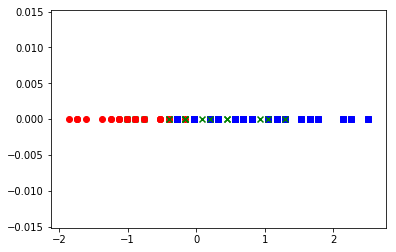

In [28]:
#knn降为2唯
from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


train = zipp[0:90]
test = zipp[90:150]
print(len(train))
print(len(test))

train = zip(*train)
train = list(train)
test = zip(*test)
test = list(test)
#print(train)
#print('=======')
#print(test)

train_d = list(train[0])
train_t = np.array(list(train[1]))
test_d = list(test[0])
test_t = np.array(list(test[1]))

ss = StandardScaler()
zscore = ss.fit(train_d)
train_d = zscore.transform(train_d)
test_d = zscore.transform(test_d)

pca = PCA(n_components=3)
reduced_train_d = pca.fit_transform(train_d)
reduced_test_d = pca.transform(test_d)

knc = KNeighborsClassifier()
knc.fit(reduced_train_d,train_t)
y_predict = knc.predict(reduced_test_d)

acc = 0

print(y_predict)
print(test_t)

for i in range(60):
    if(y_predict[i] == test_t[i]): acc += 1
print('{}/{}'.format(acc,60))

for i in range(90):
    if(train_t[i] == 0):
        plt.scatter(train_d[i][0],train_d[i][1],c='r',marker='o')
    elif(train_t[i] == 1):
        plt.scatter(train_d[i][0],train_d[i][1],c='g',marker='x')
    elif(train_t[i] == 2):
        plt.scatter(train_d[i][0],train_d[i][1],c='b',marker='s')
plt.show()

In [245]:
#knn升维rbf
from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

train = zipp[0:90]
test = zipp[90:150]
print(len(train))
print(len(test))

train = zip(*train)
train = list(train)
test = zip(*test)
test = list(test)
#print(train)
#print('=======')
#print(test)

train_d = list(train[0])
train_t = np.array(list(train[1]))
test_d = list(test[0])
test_t = np.array(list(test[1]))

ss = StandardScaler()
zscore = ss.fit(train_d)
train_d = zscore.transform(train_d)
test_d = zscore.transform(test_d)

poly = PolynomialFeatures(degree=2)
train_d_up = poly.fit_transform(train_d)
test_d_up = poly.transform(test_d)

print(train_d_up[0])

knc = KNeighborsClassifier()
knc.fit(train_d_up,train_t)
y_predict = knc.predict(test_d_up)

acc = 0

print(y_predict)
print(test_t)

for i in range(60):
    if(y_predict[i] == test_t[i]): acc += 1
print('{}/{}'.format(acc,60))


90
60
[ 1.         -1.13064705 -1.42665407 -0.19440735 -0.15823503  1.27836275
  1.61304222  0.2198061   0.17890797  2.03534184  0.27735204  0.22574665
  0.03779422  0.03076205  0.02503832]
[1 2 1 2 1 2 2 2 1 1 0 0 0 2 2 0 1 2 0 1 0 0 1 2 0 0 2 2 2 1 2 1 1 1 2 0 2
 2 2 1 0 0 2 0 1 0 1 0 2 0 0 1 1 2 1 1 0 2 2 1]
[1 2 1 2 2 2 2 2 1 1 0 0 0 2 2 0 1 2 0 2 0 0 1 2 0 0 2 2 2 1 2 1 1 1 2 0 2
 2 2 1 0 0 2 0 2 0 2 0 2 0 0 1 1 2 1 1 0 2 2 2]
55/60


In [253]:
#logistic不改动
import torch
import torch.nn as nn

from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import copy


train = zipp[0:90]
test = zipp[90:150]
print(len(train))
print(len(test))

train = zip(*train)
train = list(train)
test = zip(*test)
test = list(test)
#print(train)
#print('=======')
#print(test)

train_d = np.array(list(train[0]))
train_t = np.array(list(train[1]))
test_d = np.array(list(test[0]))
test_t = np.array(list(test[1]))

train_t1 = np.zeros([90,3])
test_t1 = np.zeros([60,3])

for i in range(90):
    train_t1[i][train_t[i]] = 1
    
for i in range(60):
    test_t1[i][test_t[i]] = 1
    
#print(test_t)
#print(test_t1)

ss = StandardScaler()
zscore = ss.fit(train_d)
train_d = zscore.transform(train_d)
test_d = zscore.transform(test_d)

feature_num = 4
cluster_num = 3

train_d = torch.from_numpy(train_d).float()
train_t = torch.from_numpy(train_t).long()
test_d = torch.from_numpy(test_d).float()
test_t = torch.from_numpy(test_t).long()

print(train_d.type())

model = nn.Sequential(
    nn.Linear(feature_num,cluster_num),
    nn.Sigmoid()
)


learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()
m_acc = 0
para = model.parameters()

for t in range(30000):
    
    # 前向传播：通过像模型输入x计算预测的y
    y_pred = model(train_d)

    # 计算并打印loss
    loss = loss_fn(y_pred, train_t)
    acc = 0
    m = torch.max(y_pred,1)
    for j in range(90):
        if(m[1][j] == train_t[j]): acc += 1
            
    
    y_pred_test = model(test_d)
    acc_test = 0
    m_test = torch.max(y_pred_test,1)
    for j in range(60):
        if(m_test[1][j] == test_t[j]): acc_test += 1
    if t%4000 == 0:
        print('epoch',t)
    if acc_test > m_acc:
        m_acc = acc_test
        print('=====================================')
        print('{}/{}'.format(acc,90))
        print('{}/{}'.format(acc_test,60))

        print(t, loss.item())    
        for i in model.parameters():
            print(i)
        
        print('=====================================')    

    # 在反向传播之前，使用optimizer将它要更新的所有张量的梯度清零(这些张量是模型可学习的权重)
    optimizer.zero_grad()

    # 反向传播：根据模型的参数计算loss的梯度
    loss.backward()

    # 调用Optimizer的step函数使它所有参数更新
    optimizer.step()

90
60
torch.FloatTensor
epoch 0
9/90
5/60
0 1.1255946159362793
Parameter containing:
tensor([[ 0.4175, -0.3420, -0.0565,  0.4897],
        [ 0.0235, -0.3299, -0.1481,  0.1614],
        [-0.2073,  0.4230,  0.4935,  0.4775]], requires_grad=True)
Parameter containing:
tensor([-0.1627, -0.4260, -0.4116], requires_grad=True)
9/90
6/60
110 1.1181787252426147
Parameter containing:
tensor([[ 0.4065, -0.3309, -0.0676,  0.4787],
        [ 0.0344, -0.3409, -0.1372,  0.1724],
        [-0.1964,  0.4121,  0.5045,  0.4885]], requires_grad=True)
Parameter containing:
tensor([-0.1736, -0.4150, -0.4226], requires_grad=True)
9/90
7/60
111 1.1181116104125977
Parameter containing:
tensor([[ 0.4064, -0.3308, -0.0677,  0.4786],
        [ 0.0345, -0.3410, -0.1371,  0.1725],
        [-0.1963,  0.4120,  0.5046,  0.4886]], requires_grad=True)
Parameter containing:
tensor([-0.1737, -0.4149, -0.4227], requires_grad=True)
9/90
8/60
196 1.1124367713928223
Parameter containing:
tensor([[ 0.3978, -0.3223, -0.0762,  0.

33/90
30/60
848 1.0705195665359497
Parameter containing:
tensor([[ 0.3309, -0.2558, -0.1429,  0.4034],
        [ 0.1036, -0.4132, -0.0669,  0.2417],
        [-0.1261,  0.3444,  0.5749,  0.5592]], requires_grad=True)
Parameter containing:
tensor([-0.2397, -0.3407, -0.4924], requires_grad=True)
37/90
31/60
899 1.067359447479248
Parameter containing:
tensor([[ 0.3257, -0.2505, -0.1481,  0.3981],
        [ 0.1081, -0.4181, -0.0622,  0.2462],
        [-0.1214,  0.3401,  0.5796,  0.5639]], requires_grad=True)
Parameter containing:
tensor([-0.2436, -0.3355, -0.4971], requires_grad=True)
37/90
32/60
909 1.0667420625686646
Parameter containing:
tensor([[ 0.3246, -0.2495, -0.1492,  0.3971],
        [ 0.1090, -0.4191, -0.0613,  0.2471],
        [-0.1205,  0.3393,  0.5805,  0.5648]], requires_grad=True)
Parameter containing:
tensor([-0.2444, -0.3345, -0.4980], requires_grad=True)
38/90
33/60
919 1.0661245584487915
Parameter containing:
tensor([[ 0.3236, -0.2484, -0.1502,  0.3961],
        [ 0.1099

In [254]:
#logistic降维
import torch
import torch.nn as nn

from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

import copy


train = zipp[0:90]
test = zipp[90:150]
print(len(train))
print(len(test))

train = zip(*train)
train = list(train)
test = zip(*test)
test = list(test)
#print(train)
#print('=======')
#print(test)

train_d = np.array(list(train[0]))
train_t = np.array(list(train[1]))
test_d = np.array(list(test[0]))
test_t = np.array(list(test[1]))

train_t1 = np.zeros([90,3])
test_t1 = np.zeros([60,3])

for i in range(90):
    train_t1[i][train_t[i]] = 1
    
for i in range(60):
    test_t1[i][test_t[i]] = 1
    
#print(test_t)
#print(test_t1)

ss = StandardScaler()
zscore = ss.fit(train_d)
train_d = zscore.transform(train_d)
test_d = zscore.transform(test_d)

pca = PCA(n_components=2)
reduced_train_d = pca.fit_transform(train_d)
reduced_test_d = pca.transform(test_d)

feature_num = 2
cluster_num = 3

train_d = torch.from_numpy(reduced_train_d).float()
train_t = torch.from_numpy(train_t).long()
test_d = torch.from_numpy(reduced_test_d).float()
test_t = torch.from_numpy(test_t).long()

print(train_d.type())

model = nn.Sequential(
    nn.Linear(feature_num,cluster_num),
    nn.Sigmoid()
)


learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()
m_acc = 0
para = model.parameters()

for t in range(30000):
    
    # 前向传播：通过像模型输入x计算预测的y
    y_pred = model(train_d)

    # 计算并打印loss
    loss = loss_fn(y_pred, train_t)
    acc = 0
    m = torch.max(y_pred,1)
    for j in range(90):
        if(m[1][j] == train_t[j]): acc += 1
            
    
    y_pred_test = model(test_d)
    acc_test = 0
    m_test = torch.max(y_pred_test,1)
    for j in range(60):
        if(m_test[1][j] == test_t[j]): acc_test += 1
    
    if acc_test > m_acc:
        m_acc = acc_test
        print('=====================================')
        print('{}/{}'.format(acc,90))
        print('{}/{}'.format(acc_test,60))

        print(t, loss.item())    
        for i in model.parameters():
            print(i)
        
        print('=====================================')    

    # 在反向传播之前，使用optimizer将它要更新的所有张量的梯度清零(这些张量是模型可学习的权重)
    optimizer.zero_grad()

    # 反向传播：根据模型的参数计算loss的梯度
    loss.backward()

    # 调用Optimizer的step函数使它所有参数更新
    optimizer.step()

90
60
torch.FloatTensor
24/90
9/60
0 1.0911362171173096
Parameter containing:
tensor([[ 0.1500, -0.1396],
        [ 0.4100, -0.2151],
        [-0.0367,  0.4016]], requires_grad=True)
Parameter containing:
tensor([ 0.3080,  0.0419, -0.0376], requires_grad=True)
29/90
10/60
115 1.0855871438980103
Parameter containing:
tensor([[ 0.1385, -0.1281],
        [ 0.4215, -0.2265],
        [-0.0252,  0.4130]], requires_grad=True)
Parameter containing:
tensor([ 0.3195,  0.0534, -0.0490], requires_grad=True)
29/90
11/60
132 1.0847711563110352
Parameter containing:
tensor([[ 0.1368, -0.1264],
        [ 0.4232, -0.2282],
        [-0.0235,  0.4147]], requires_grad=True)
Parameter containing:
tensor([ 0.3211,  0.0551, -0.0507], requires_grad=True)
32/90
12/60
185 1.082236647605896
Parameter containing:
tensor([[ 0.1315, -0.1211],
        [ 0.4284, -0.2335],
        [-0.0182,  0.4199]], requires_grad=True)
Parameter containing:
tensor([ 0.3263,  0.0604, -0.0560], requires_grad=True)
32/90
13/60
190 1.08

In [251]:
#logistic升维
import torch
import torch.nn as nn

from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import copy


train = zipp[0:90]
test = zipp[90:150]
print(len(train))
print(len(test))

train = zip(*train)
train = list(train)
test = zip(*test)
test = list(test)
#print(train)
#print('=======')
#print(test)

train_d = np.array(list(train[0]))
train_t = np.array(list(train[1]))
test_d = np.array(list(test[0]))
test_t = np.array(list(test[1]))

train_t1 = np.zeros([90,3])
test_t1 = np.zeros([60,3])

for i in range(90):
    train_t1[i][train_t[i]] = 1
    
for i in range(60):
    test_t1[i][test_t[i]] = 1
    
#print(test_t)
#print(test_t1)

ss = StandardScaler()
zscore = ss.fit(train_d)
train_d = zscore.transform(train_d)
test_d = zscore.transform(test_d)

poly = PolynomialFeatures(degree=2)
train_d_up = poly.fit_transform(train_d)
test_d_up = poly.transform(test_d)

feature_num = 15
cluster_num = 3

train_d = torch.from_numpy(train_d_up).float()
train_t = torch.from_numpy(train_t).long()
test_d = torch.from_numpy(test_d_up).float()
test_t = torch.from_numpy(test_t).long()

print(train_d.type())

model = nn.Sequential(
    nn.Linear(feature_num,cluster_num),
    nn.Sigmoid()
)


learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()
m_acc = 0
para = model.parameters()

for t in range(30000):
    
    # 前向传播：通过像模型输入x计算预测的y
    y_pred = model(train_d)

    # 计算并打印loss
    loss = loss_fn(y_pred, train_t)
    acc = 0
    m = torch.max(y_pred,1)
    for j in range(90):
        if(m[1][j] == train_t[j]): acc += 1
            
    
    y_pred_test = model(test_d)
    acc_test = 0
    m_test = torch.max(y_pred_test,1)
    for j in range(60):
        if(m_test[1][j] == test_t[j]): acc_test += 1
    
    if acc_test > m_acc:
        m_acc = acc_test
        print('=====================================')
        print('{}/{}'.format(acc,90))
        print('{}/{}'.format(acc_test,60))

        print(t, loss.item())    
        for i in model.parameters():
            print(i)
        
        print('=====================================')    

    # 在反向传播之前，使用optimizer将它要更新的所有张量的梯度清零(这些张量是模型可学习的权重)
    optimizer.zero_grad()

    # 反向传播：根据模型的参数计算loss的梯度
    loss.backward()

    # 调用Optimizer的step函数使它所有参数更新
    optimizer.step()

90
60
torch.FloatTensor
20/90
23/60
0 1.0834370851516724
Parameter containing:
tensor([[ 0.1268,  0.0124, -0.0455, -0.0654,  0.0695,  0.0933,  0.2529, -0.2360,
          0.1698,  0.2032,  0.0451, -0.0127,  0.0562,  0.1209,  0.1981],
        [-0.2462, -0.1599,  0.0213, -0.1479,  0.2271,  0.1699,  0.1752, -0.0881,
         -0.0881, -0.2074,  0.2189, -0.0687, -0.2294,  0.1327, -0.1390],
        [-0.1891,  0.2039,  0.1253,  0.2394, -0.1718,  0.0356, -0.0370,  0.1648,
          0.0132,  0.0027, -0.0943, -0.0765,  0.2120,  0.0849,  0.2419]],
       requires_grad=True)
Parameter containing:
tensor([-0.0173, -0.1051,  0.2493], requires_grad=True)
21/90
24/60
33 1.0787858963012695
Parameter containing:
tensor([[ 0.1234,  0.0092, -0.0422, -0.0687,  0.0662,  0.0966,  0.2496, -0.2327,
          0.1731,  0.2064,  0.0418, -0.0160,  0.0595,  0.1242,  0.2014],
        [-0.2429, -0.1566,  0.0180, -0.1447,  0.2304,  0.1667,  0.1785, -0.0914,
         -0.0914, -0.2041,  0.2222, -0.0654, -0.2327,  0.1294,

51/90
38/60
900 0.9753207564353943
Parameter containing:
tensor([[ 0.0039, -0.0718,  0.0387, -0.1497, -0.0149,  0.0474,  0.1725, -0.1732,
          0.2368,  0.1892, -0.0288, -0.0880,  0.1244,  0.1893,  0.2632],
        [-0.1524, -0.0759, -0.0680, -0.0628,  0.3095,  0.1732,  0.2550, -0.1667,
         -0.1693, -0.1132,  0.2448, -0.0018, -0.3100,  0.0502, -0.2228],
        [-0.2759,  0.2989,  0.0261,  0.3338, -0.0778, -0.0311,  0.0536,  0.0940,
         -0.0548, -0.0874, -0.0029,  0.0156,  0.1325,  0.0095,  0.2044]],
       requires_grad=True)
Parameter containing:
tensor([-0.1403, -0.0113,  0.1625], requires_grad=True)
51/90
39/60
901 0.9752195477485657
Parameter containing:
tensor([[ 0.0037, -0.0719,  0.0388, -0.1498, -0.0150,  0.0472,  0.1724, -0.1732,
          0.2368,  0.1891, -0.0288, -0.0880,  0.1245,  0.1894,  0.2632],
        [-0.1523, -0.0759, -0.0681, -0.0627,  0.3096,  0.1733,  0.2551, -0.1667,
         -0.1694, -0.1131,  0.2448, -0.0018, -0.3101,  0.0502, -0.2229],
        [-

69/90
51/60
1420 0.9265018701553345
Parameter containing:
tensor([[-0.0610, -0.1200,  0.0856, -0.1977, -0.0630, -0.0328,  0.1271, -0.1663,
          0.2535,  0.1202, -0.0671, -0.1278,  0.1468,  0.2120,  0.2783],
        [-0.0985, -0.0309, -0.1187, -0.0169,  0.3517,  0.2318,  0.2919, -0.2089,
         -0.2136, -0.0595,  0.1914,  0.0220, -0.3539,  0.0048, -0.2693],
        [-0.3205,  0.3487, -0.0155,  0.3831, -0.0284, -0.0437,  0.0939,  0.0788,
         -0.0635, -0.1301,  0.0378,  0.0562,  0.1082, -0.0027,  0.2735]],
       requires_grad=True)
Parameter containing:
tensor([-0.2052,  0.0427,  0.1179], requires_grad=True)
69/90
52/60
1426 0.9259788393974304
Parameter containing:
tensor([[-0.0617, -0.1205,  0.0861, -0.1982, -0.0636, -0.0337,  0.1265, -0.1664,
          0.2536,  0.1194, -0.0676, -0.1282,  0.1470,  0.2122,  0.2784],
        [-0.0979, -0.0304, -0.1193, -0.0164,  0.3522,  0.2325,  0.2923, -0.2094,
         -0.2141, -0.0589,  0.1906,  0.0223, -0.3544,  0.0043, -0.2698],
        